# Precision and Resolution Analysis

This serve as an initial investigation on the precision of a polar plotter machine.

A typical diagram of the plotter machine:

![](./image/drawio_editable/simple_diagram.png)

---

We assuming the motor ($u$ and $v$) are horizontally aligned. And a X-Y plane is defined as:

![](./image/drawio_editable/simple_diagram_definition.png)


In [87]:
import math

In [37]:
# Define the motor U, V position. The unit is in mm
x_u = 0
x_v = 1000

def xy2uv(x, y):
    s_y = y ** 2
    u = math.sqrt((x_u - x) ** 2 + s_y)
    v = math.sqrt((x_v - x) ** 2 + s_y)
    return u, v



## Precision on height (Y)

Compare the delta movements of string u and v at different heights: (the larger the better, means we have more resolution)

In [38]:
dx = (x_u - x_v) * 0.9  # 90% of X length
x_middle = (x_u + x_v) / 2
x1 = x_middle - (dx / 2)
x2 = x_middle + (dx / 2)

for y in [100, 900]:
    u1, v1 = xy2uv(x1, y)
    u2, v2 = xy2uv(x2, y)
    print(f'When y={y} and delta_x={dx}: delta_u={u2-u1:.2f}, delta_v={v2-v1:.2f}')


When y=100 and delta_x=-900.0: delta_u=-843.45, delta_v=843.45
When y=900 and delta_x=-900.0: delta_u=-407.24, delta_v=407.24


## Precision on height (X)

Compare the delta movements of string u and v at when move vertically at different x posistions: (the larger the better)

In [39]:
dy = 800
y1 = 100
y2 = y1 + dy

x_side = x_u + (x_v - x_u) * 0.1
x_middle = (x_u + x_v) / 2
for x in [x_side, x_middle]:
    u1, v1 = xy2uv(x, y1)
    u2, v2 = xy2uv(x, y2)
    print(f'When x={x} and delta_y={dy}: delta_u={u2-u1:.2f}, delta_v={v2-v1:.2f}')


When x=100.0 and delta_y=800: delta_u=764.12, delta_v=367.25
When x=500.0 and delta_y=800: delta_u=519.66, delta_v=519.66


## U-V precision mapping to X-Y


In [48]:
def uv2xy(u, v):
    x = (x_u + x_v) - (u * u - v * v) / (x_u - x_v)
    x = x / 2
    y = (v ** 2) - (x_v - x) ** 2
    y = math.sqrt(y)
    return x, y

In [54]:
# Let's do a simple verification to see if we do the math right
x, y = 25., 700.
x_new, y_new = uv2xy(*xy2uv(x, y))
print(x, x_new, x - x_new)
print(y, y_new, y - y_new)

25.0 25.0 0.0
700.0 700.0 0.0


$(R_x, R_y)$ is the X-Y resolution of a point $P(x, y)$. 
Let's define resolution X (and Y) as:

$$ R_x = | x - \hat{x} | $$

and

$$ x = \text{uv2xy}(u_p, v_p)|x $$
$$ \hat{x} = \text{uv2xy}(u_p + S_L, v_p + S_L)|x $$

where $(u_p, v_p)$ is the string lengths, $S_L$ is the motor resolution step length.

In [72]:
# Define the minimum motor resolution length (also in mm)
s_l = 2

def calc_resolution(x, y):
    u, v = xy2uv(x, y)
    dx, dy = uv2xy(u + s_l, v + s_l)
    rx = abs(x - dx)
    ry = abs(y - dy)
    return rx, ry

In [86]:
x, y = 50, 80
res_x, res_y = calc_resolution(x, y)

print('Explaination:')
print(f'At P(x, y)=({x}, {y}), the resolution is about ({res_x}, {res_y}).')
print(f'This means, a smallest possible movement on the motor u and v, makes a movment of {res_x:.2f} in x direction, and {res_y:.2f} in y at point P.')
print('Smaller the value means better the resolution on the given point.')

Explaination:
At P(x, y)=(50, 80), the resolution is about (1.718045318193333, 3.3679320685485834).
This means, a smallest possible movement on the motor u and v, makes a movment of 1.72 in x direction, and 3.37 in y at point P.
Smaller the value means better the resolution on the given point.


In [89]:
import matplotlib.pyplot as plt
import numpy as np

xy_map = []
x_length = x_v - x_u

for y in range(x_length):
    col = []
    for x in range(x_length):
        res_xy = list(calc_resolution(x, y))
        col.append(res_xy)
    xy_map.append(col)


xy_map = np.array(xy_map)
xy_map

array([[[2.        , 0.        ],
        [1.996     , 2.82983816],
        [1.992     , 3.999992  ],
        ...,
        [1.988     , 4.89651468],
        [1.992     , 3.999992  ],
        [1.996     , 2.82983816]],

       [[1.998001  , 1.23785433],
        [1.99517257, 2.26595863],
        [1.99152887, 3.23605951],
        ...,
        [1.98767645, 4.06204619],
        [1.99152887, 3.23605951],
        [1.99517257, 2.26595863]],

       [[1.996004  , 1.46640564],
        [1.99353187, 2.117908  ],
        [1.99034715, 2.82841748],
        ...,
        [1.98679291, 3.51322197],
        [1.99034715, 2.82841748],
        [1.99353187, 2.117908  ]],

       ...,

       [[0.83018767, 1.99965505],
        [0.82877068, 2.00048683],
        [0.8273524 , 2.00131778],
        ...,
        [0.82593282, 2.00214789],
        [0.8273524 , 2.00131778],
        [0.82877068, 2.00048683]],

       [[0.82960011, 1.99965588],
        [0.82818384, 2.00048624],
        [0.82676626, 2.00131577],
        .

Resolution on X


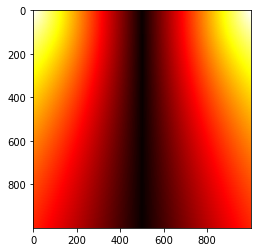

In [90]:
print('Resolution on X')
plt.imshow(xy_map[:,:,0], cmap='hot', interpolation='nearest')
plt.show()

Resolution on Y


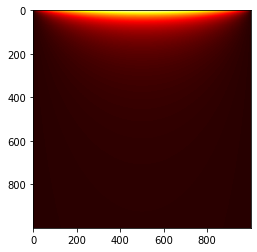

In [91]:
print('Resolution on Y')
plt.imshow(xy_map[:,:,1], cmap='hot', interpolation='nearest')
plt.show()

## Take-away

- Middle the of the canvas give better resolution
- Longer the pull cable, better the resolution